<a href="https://www.kaggle.com/code/rajadurai23/chennaihousepriceprediction?scriptVersionId=268662304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Chennai House Price Prediction </h1>

In [89]:
from IPython.display import Image
Image("/kaggle/input/chennai-image/chennai.jpeg")

FileNotFoundError: No such file or directory: '/kaggle/input/chennai-image/chennai.jpeg'

FileNotFoundError: No such file or directory: '/kaggle/input/chennai-image/chennai.jpeg'

<IPython.core.display.Image object>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


In [2]:
df = pd.read_csv("/kaggle/input/chennai-housing-sales-price/Chennai houseing sale.csv")


In [3]:
len(df)

7109

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Removing The Masked Data**

In [6]:
df = df.drop(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [8]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [7]:
## Remove null values
df = df.dropna()

# Data Cleaning Process

In [10]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [8]:
area = {'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar',
        'Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar','Adayar':'Adyar'}
df.AREA = df.AREA.replace(area)

In [9]:
df['Property_age'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [13]:
df.BUILDTYPE.value_counts()

BUILDTYPE
House         2443
Commercial    2325
Others        2305
Other           26
Comercial        4
Name: count, dtype: int64

In [10]:
name = {'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE'] = df['BUILDTYPE'].replace(name)
to_replace = {'Ab Normal': 'AbNormal', 'Adj Land': 'AdjLand', 'Partiall': 'Partial','PartiaLl':'Partial'}
df['SALE_COND'].replace(to_replace, inplace=True)

# EDA (Exploratory Data Analysis)

Text(0, 0.5, 'Sales Price')

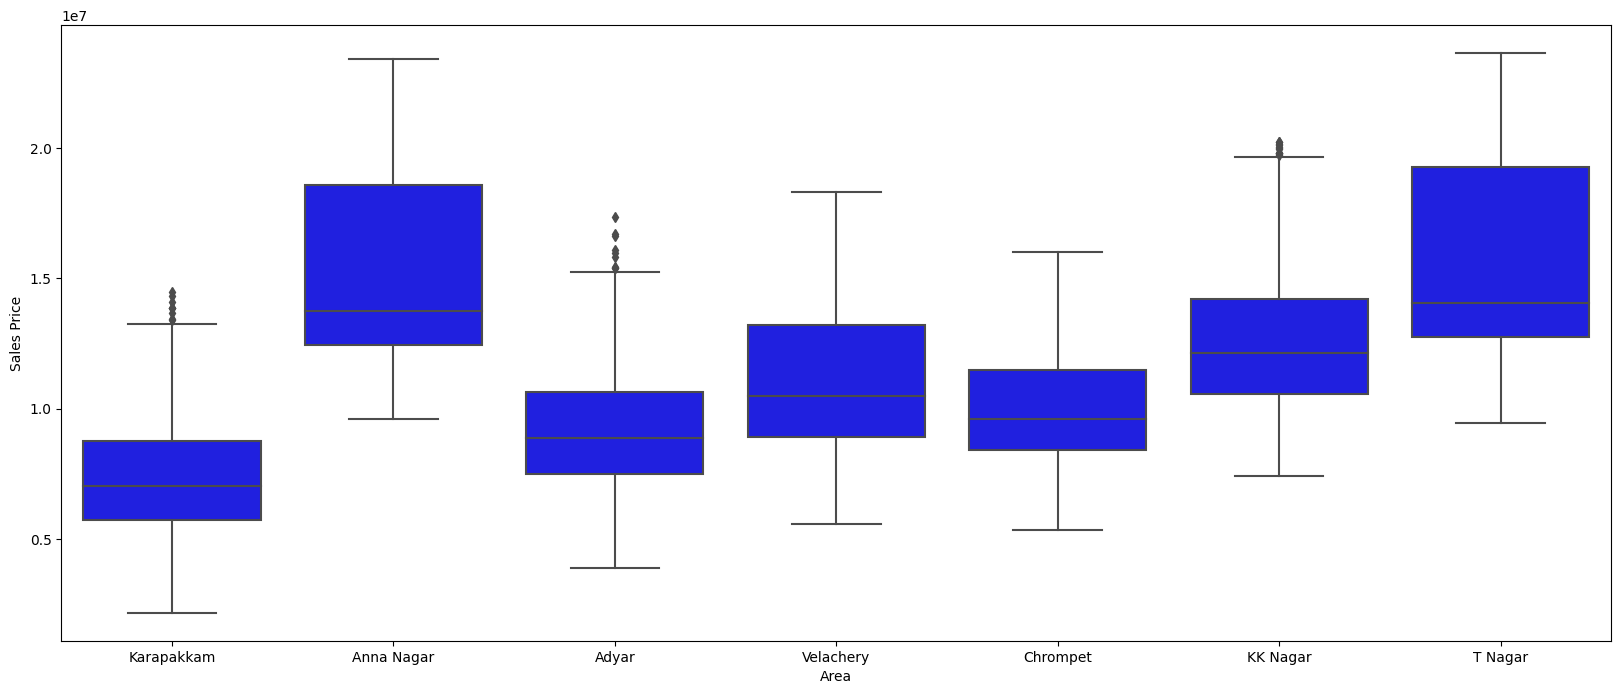

In [11]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
plt.figure(figsize=(20,8))
sns.boxplot(x = df['AREA'],y = df['SALES_PRICE'],data = df,color='blue')
plt.xlabel("Area")
plt.ylabel("Sales Price")

<p style="font-size:14px"> The Sales price of houses in T Nagar is the highest. </p>

<Axes: >

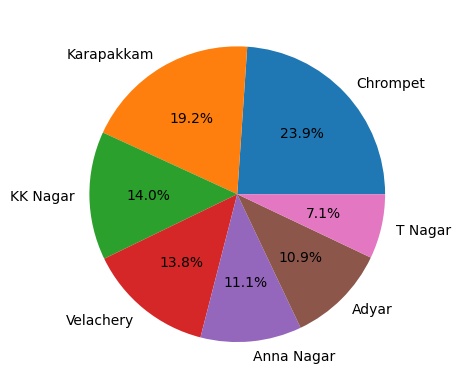

In [105]:
df['AREA'].value_counts().plot(kind='pie',ylabel='',autopct='%1.1f%%')

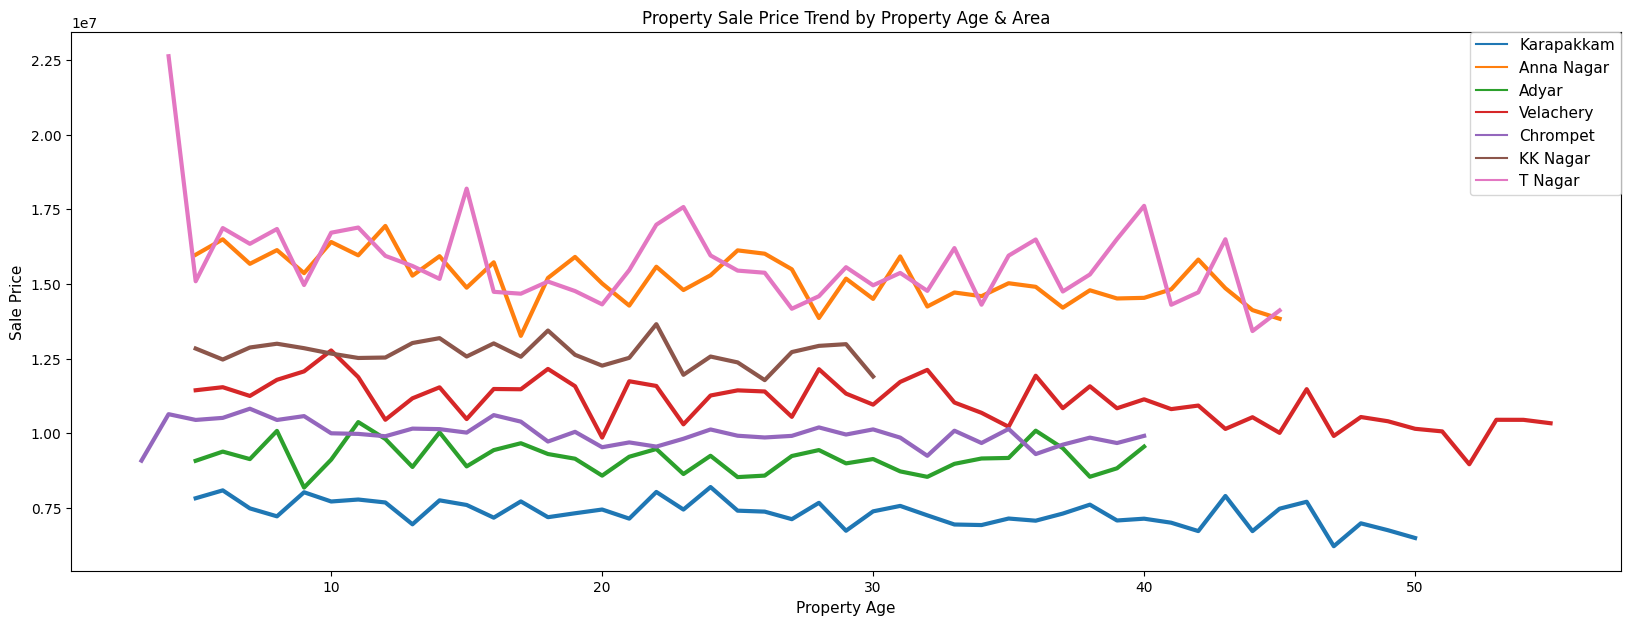

In [106]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x = "Property_age", y = "SALES_PRICE", hue="AREA", style="AREA", ci=None, linewidth=3, dashes=False).set(title='Property Sale Price Trend by Property Age & Area')
plt.legend( bbox_to_anchor=(1, 0, 0, 1),loc='best', borderaxespad=0,prop={'size':11})

plt.xlabel('Property Age', fontsize=11), plt.ylabel('Sale Price', fontsize=11)

plt.show()

<p style="font-size:14px"> The line graph provides us general view on how property age account for sales price.</p>
<p style="font-size:14px"> In general, the sales prices doesn't have a steady relationship with property age.</p>

Text(0, 0.5, 'Sales Price')

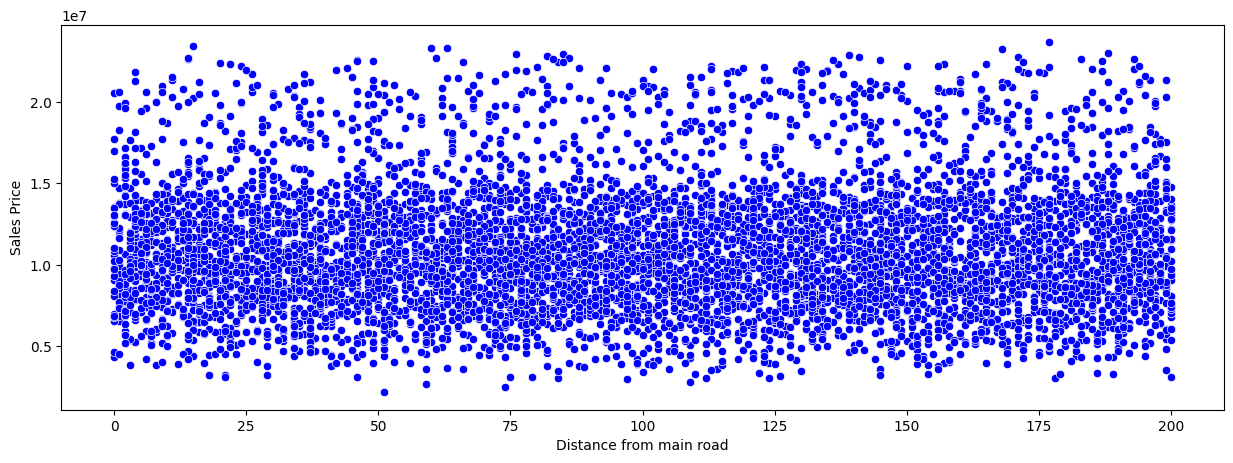

In [107]:
from matplotlib.figure import Figure
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['DIST_MAINROAD'],y = df['SALES_PRICE'],data = df,color='blue')
plt.xlabel("Distance from main road")
plt.ylabel("Sales Price")

<p style="font-size:14px">We can clearly infer from this that the distance from the main road does not affect our sales prices. </p>

<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

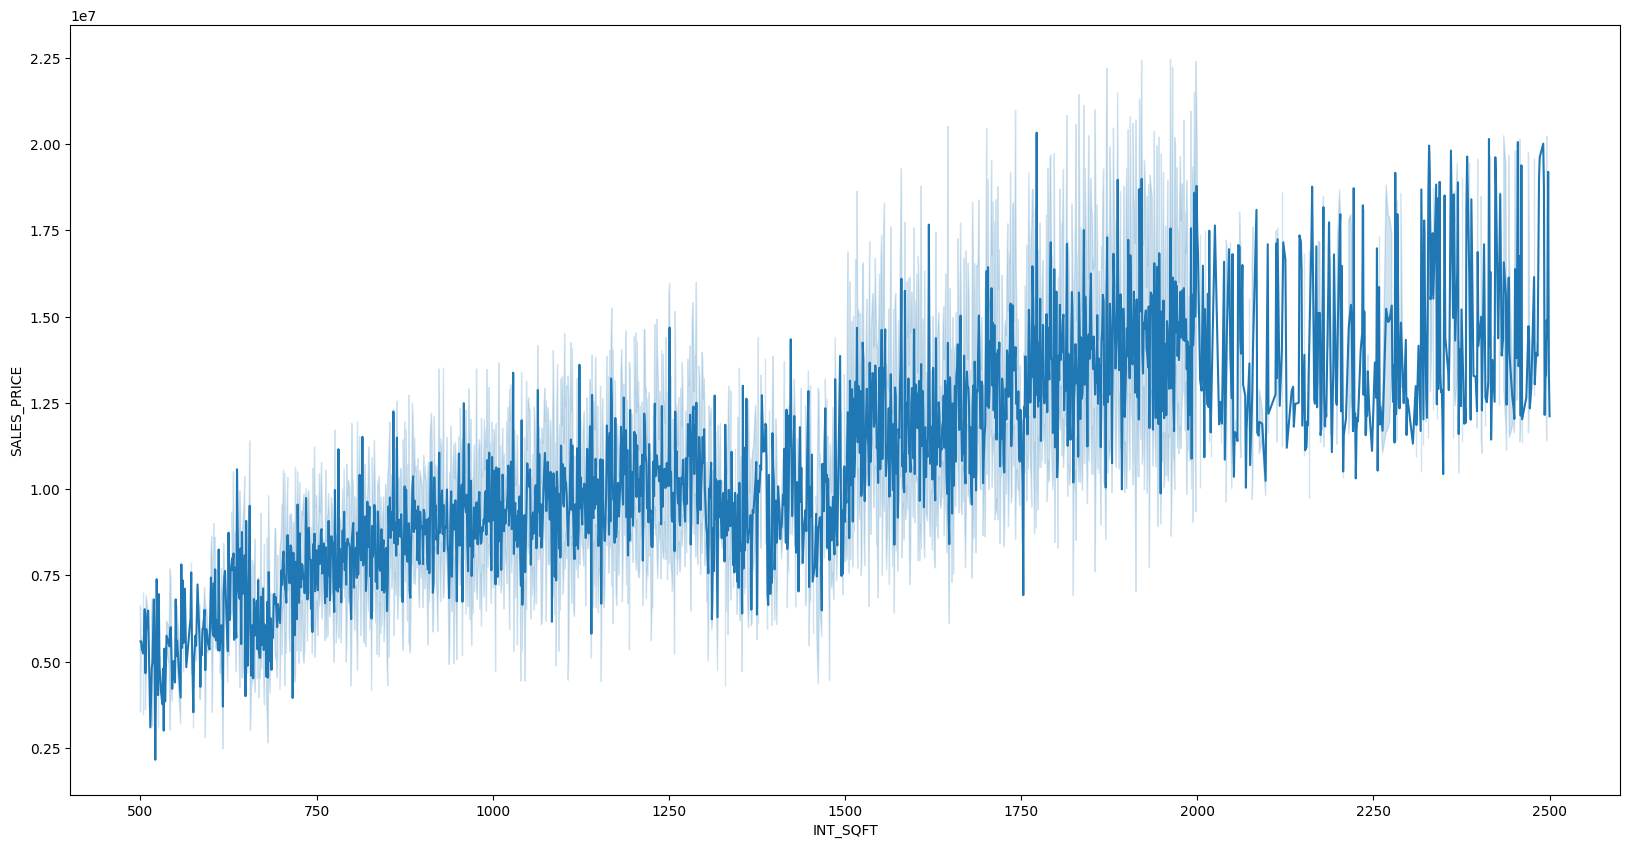

In [108]:

plt.figure(figsize=(20,10))
sns.lineplot(x = df['INT_SQFT'],y = df['SALES_PRICE'])


<p style="font-size:14px"> We can see an upward trend in sales price as sqft increase which is expected in general, also we not a irregular pattern which is caused by other factors such as area. </p>

Text(0, 0.5, 'Sales Price')

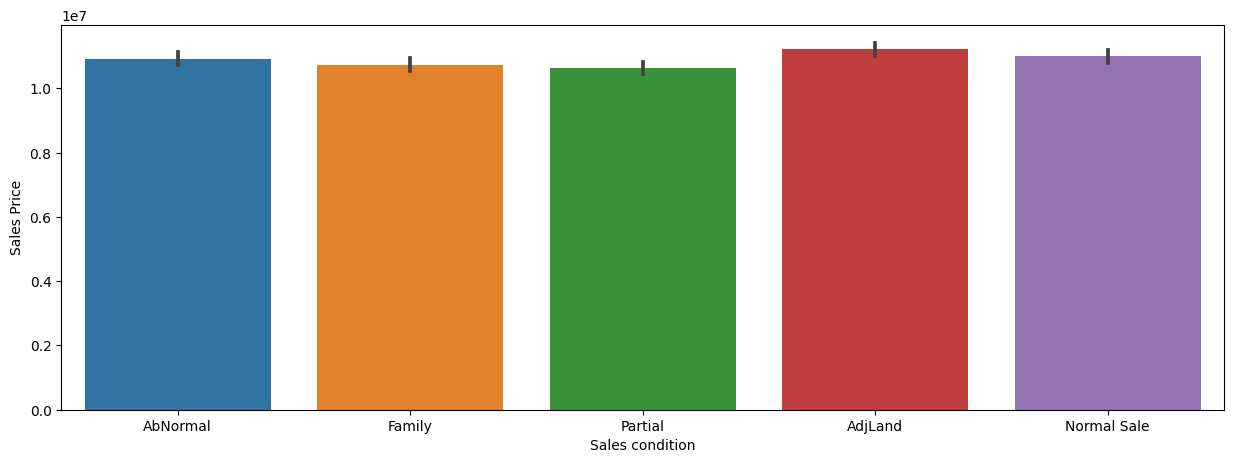

In [36]:
# import warnings
# warnings.filterwarnings('ignore')


plt.figure(figsize=(15,5))
sns.barplot(x=df['SALE_COND'],y=df['SALES_PRICE'])
plt.xlabel("Sales condition")
plt.ylabel("Sales Price")

In [41]:
df.groupby('SALE_COND')[['SALES_PRICE','INT_SQFT']].describe()

SALES_PRICE                                                     \
                  count          mean           std        min         25%   
SALE_COND                                                                    
AbNormal         1410.0  1.091482e+07  3.740499e+06  3000375.0  8326190.00   
AdjLand          1439.0  1.120931e+07  3.781297e+06  2939750.0  8569270.00   
Family           1402.0  1.073298e+07  3.763585e+06  2640250.0  8082431.25   
Normal Sale      1422.0  1.099569e+07  3.892754e+06  3013500.0  8257803.75   
Partial          1430.0  1.061676e+07  3.642422e+06  2156875.0  8036837.50   

                                                INT_SQFT               \
                    50%         75%         max    count         mean   
SALE_COND                                                               
AbNormal     10294450.0  12949295.0  22852890.0   1410.0  1380.580142   
AdjLand      10568895.0  13468010.0  23314580.0   1439.0  1378.141765   
Family       10307655.0  12866505.0  23307000.0   1402.0  1372.912981   
Normal Sale  10277975.0  13036492.5  23667340.0   1422.0  1396.118847   
Partial      10134470.0  12780132.5  22351040.0   1430.0  1382.735664   

                                                                  
                    std    min      25%     50%      75%     max  
SALE_COND                                                         
AbNormal     442.805498  506.0  1003.25  1388.0  1733.00  2500.0  
AdjLand      464.528728  500.0   974.50  1368.0  1762.00  2496.0  
Family       460.207404  500.0  1002.50  1355.5  1741.75  2495.0  
Normal Sale  469.933898  501.0   995.75  1399.0  1757.75  2499.0  
Partial      449.605148  507.0   997.00  1382.5  1738.75  2498.0

<p style="font-size:14px">The sales condition of the houses does not affect our sales price much. </p>

Text(0, 0.5, 'Sales price')

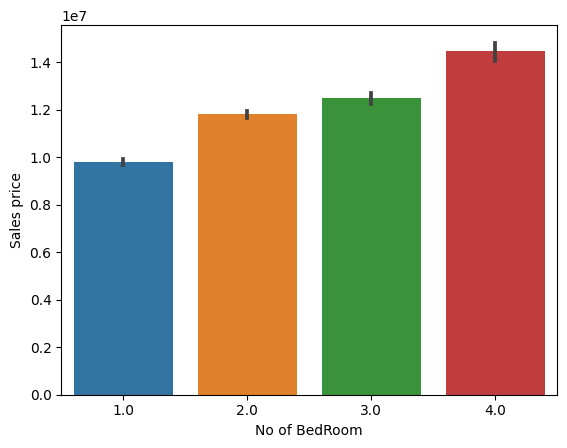

In [110]:
sns.barplot(x = df['N_BEDROOM'], y = df['SALES_PRICE'])
plt.xlabel("No of BedRoom")
plt.ylabel("Sales price")

Text(0, 0.5, 'Sales price')

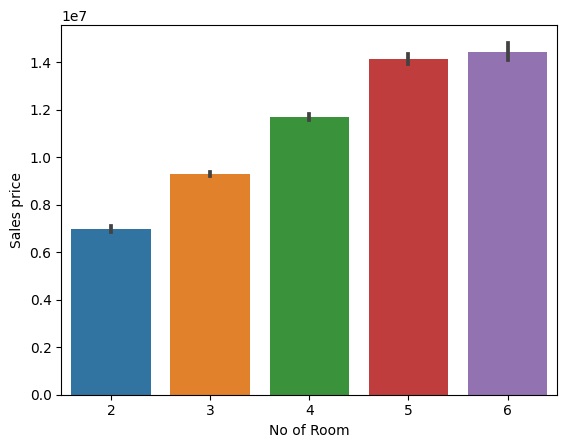

In [111]:
sns.barplot(x = df['N_ROOM'], y = df['SALES_PRICE'])
plt.xlabel("No of Room")
plt.ylabel("Sales price")

<p style="font-size:14px"> As Expected as the no of room increases the sales price also increases.</p>

<Axes: xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

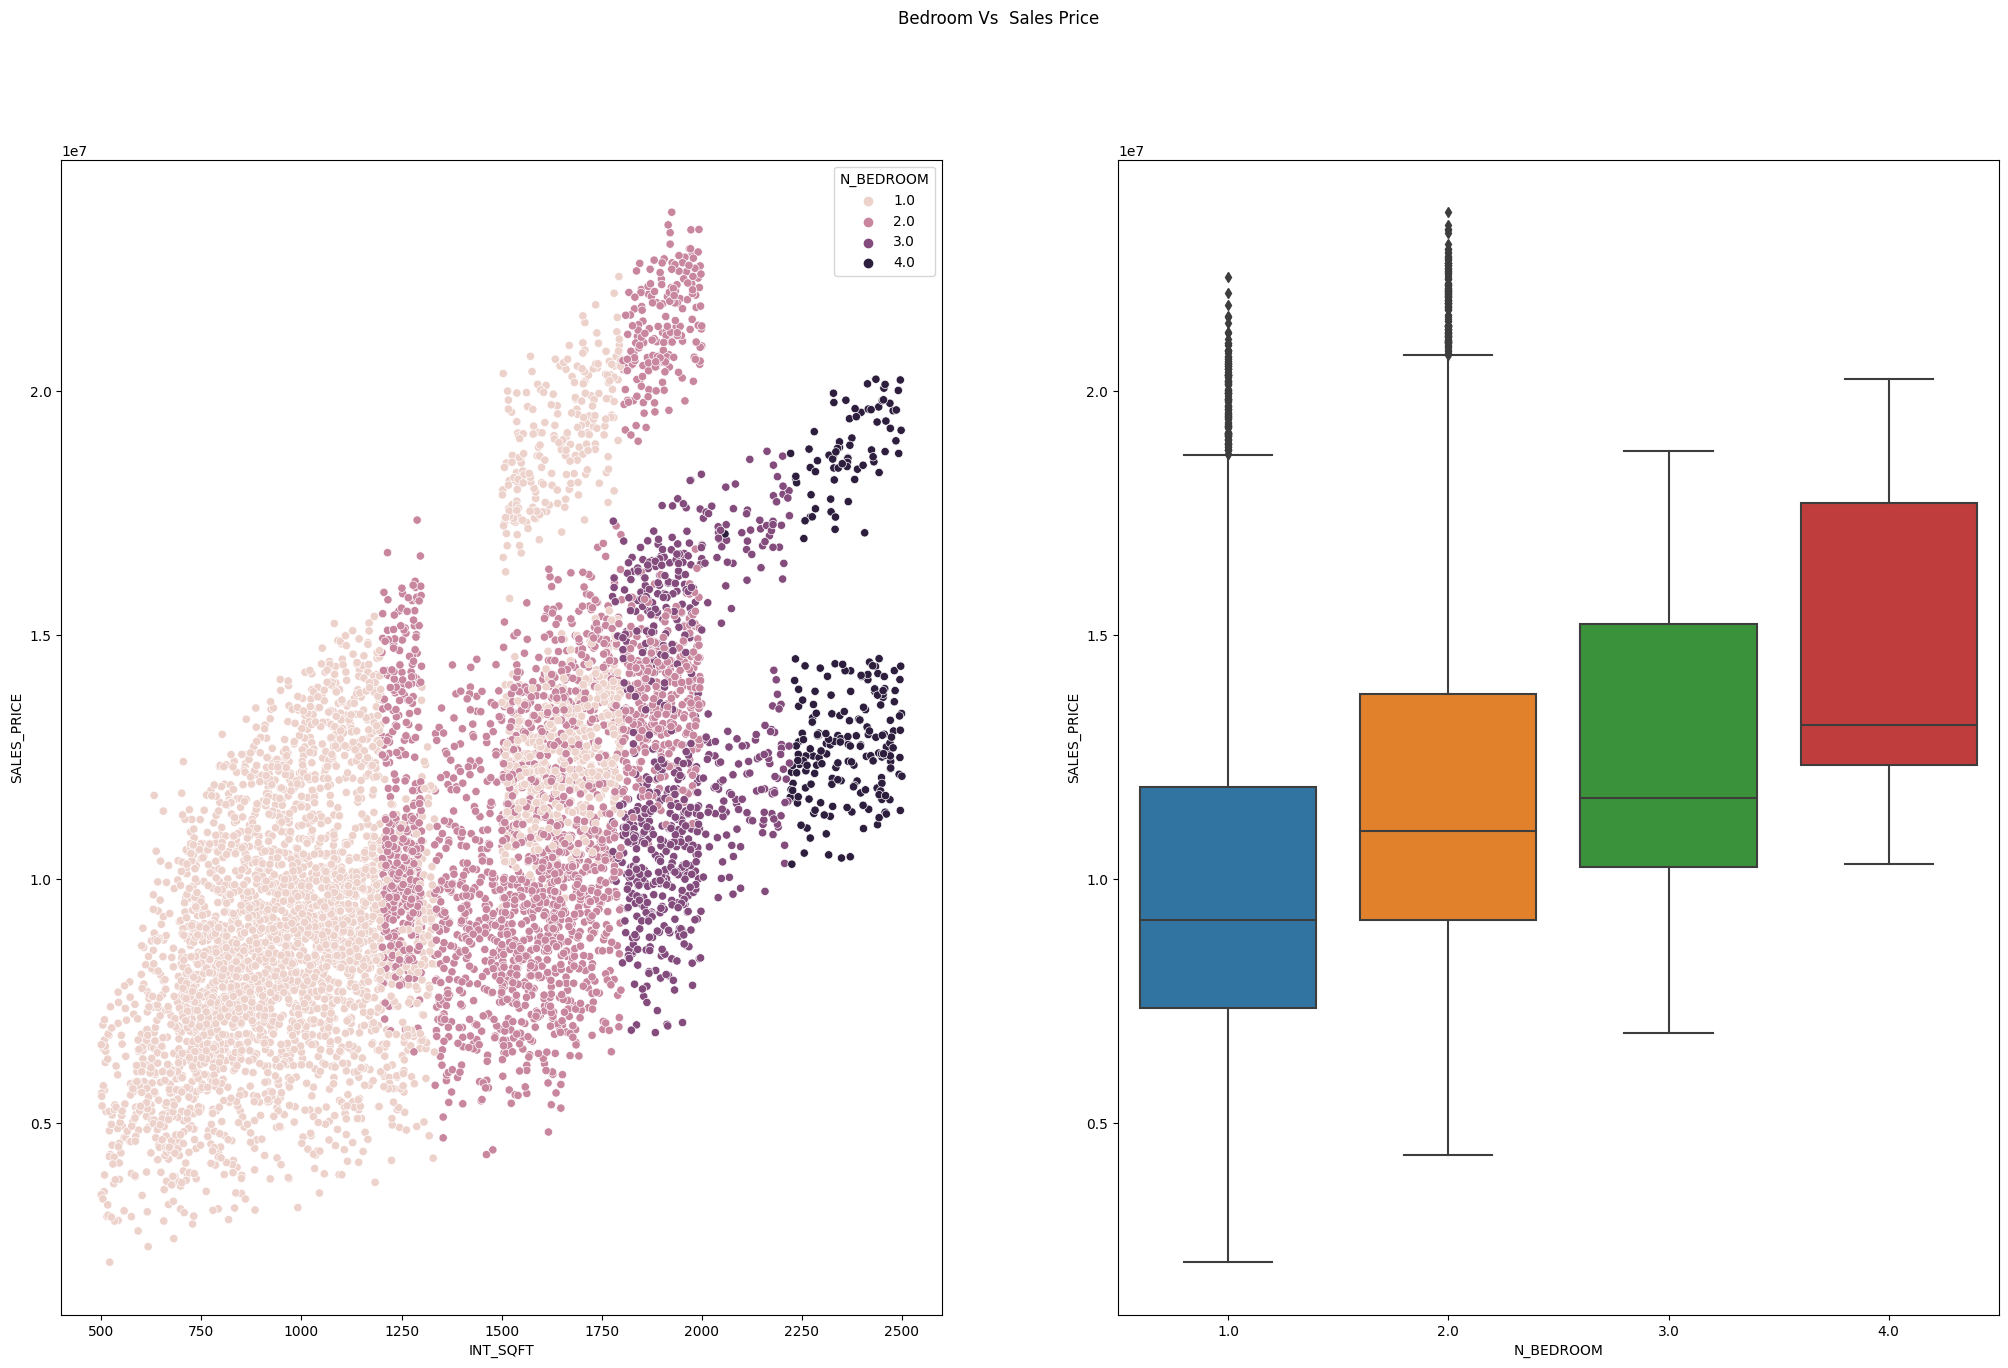

In [112]:
fig,(ax,ax1) = plt.subplots(nrows = 1,ncols = 2,figsize = (25,15))
fig.suptitle("Bedroom Vs  Sales Price")
sns.scatterplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],hue='N_BEDROOM',data=df,ax=ax)
sns.boxplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],ax=ax1)

<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

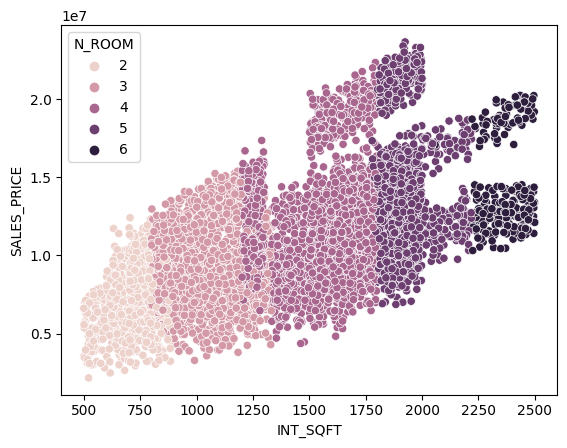

In [113]:
sns.scatterplot(data = df,x='INT_SQFT',y='SALES_PRICE',hue='N_ROOM')

<p style="font-size:14px"> As we can see INT_SQFT is representative of N_BEDROOM and both these variables are highly correlated. So, let us drop N_BEDROOM. </p>

In [12]:
df.drop(['N_ROOM'],axis=1,inplace=True)

Text(0, 0.5, 'Sales Price')

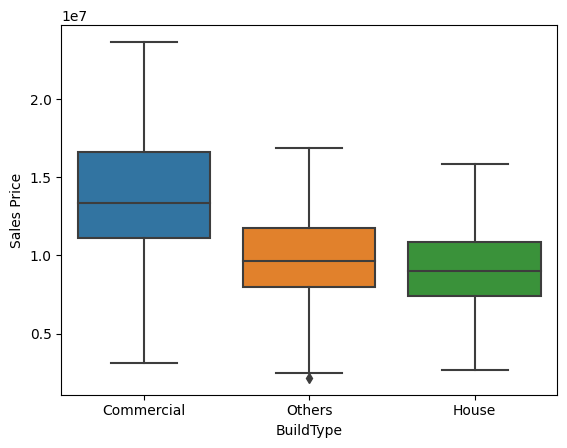

In [18]:
sns.boxplot(x = df['BUILDTYPE'],y = df['SALES_PRICE'])
plt.xlabel("BuildType")
plt.ylabel("Sales Price")


<p style="font-size:14px"> Commercial Houses have the highest Sales price</p>

Text(0, 0.5, 'Sales Price')

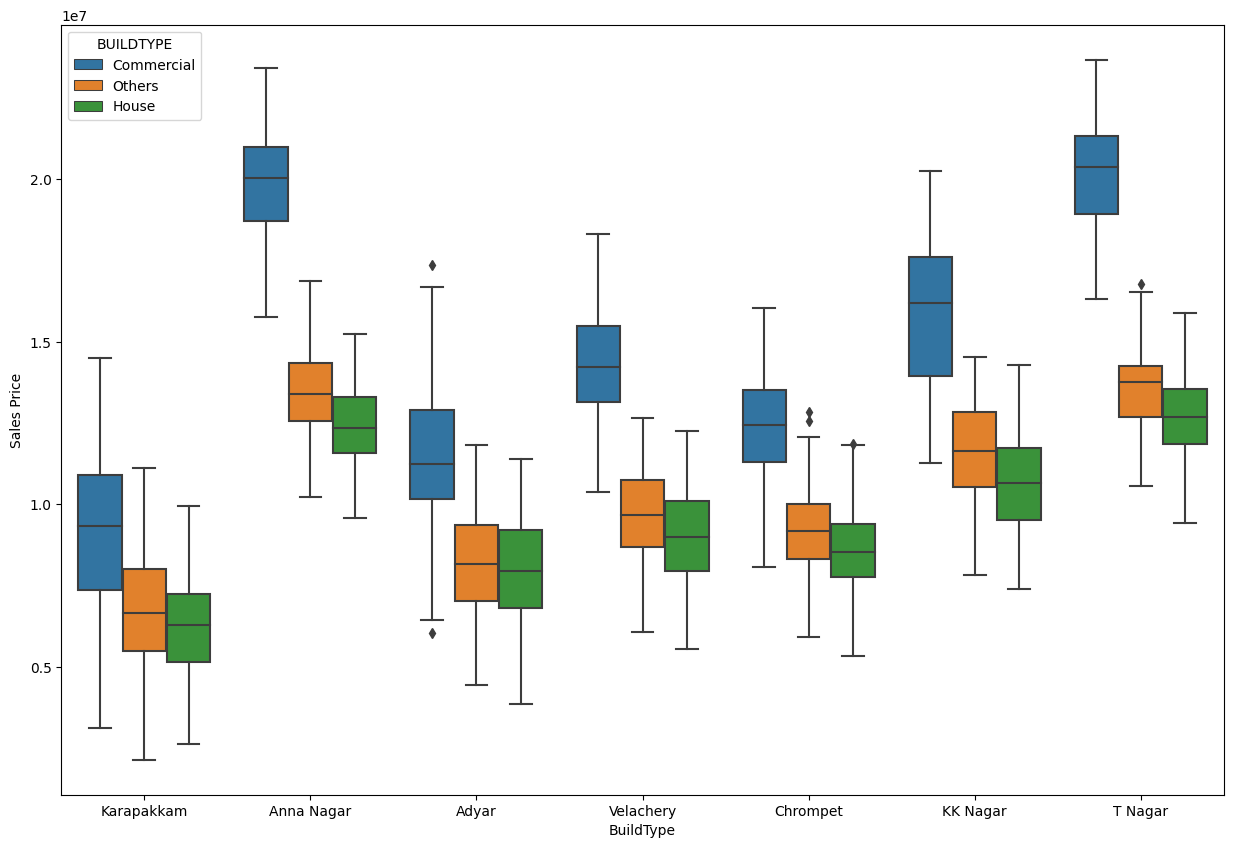

In [116]:
plt.figure(figsize=(15,10))
sns.boxplot(x = df['AREA'],y = df['SALES_PRICE'],hue='BUILDTYPE',data=df)
plt.xlabel("BuildType")
plt.ylabel("Sales Price")


In [117]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'Property_age'],
      dtype='object')

In [13]:
df = df.drop(['PRT_ID','DATE_SALE','DIST_MAINROAD','SALE_COND','DATE_BUILD','MZZONE'],axis=1)

<p style="font-size:14px"> Dropping the Columns which does not help in predicting the sales price. </p>

In [61]:
df['UTILITY_AVAIL'].unique().tolist()

['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub']

Text(0, 0.5, 'Sales price')

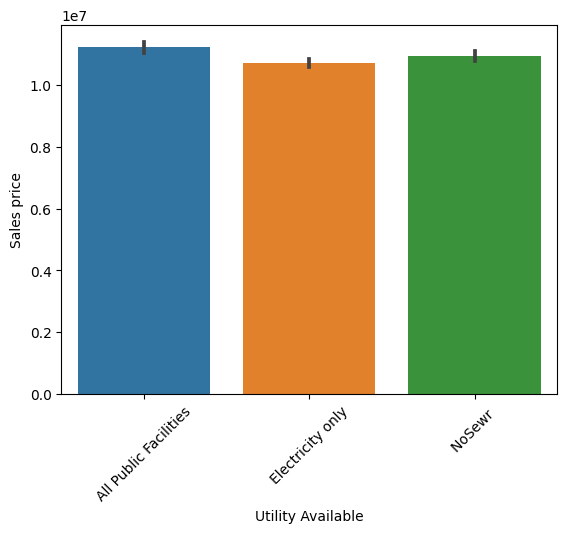

In [14]:
temp_df = df.copy()
temp_df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)
temp_df['UTILITY_AVAIL'].replace({'AllPub':'All Public Facilities','ELO':'Electricity only','NoSewr':'Electricity and water','NoSeWa':'Electricity only'},inplace=True)
sns.barplot(x = temp_df['UTILITY_AVAIL'],y = temp_df['SALES_PRICE'])
plt.xlabel('Utility Available')
plt.xticks(rotation=45)
plt.ylabel("Sales price")

In [66]:
temp_df.groupby('UTILITY_AVAIL')[['SALES_PRICE','INT_SQFT']].describe()

SALES_PRICE                                         \
                            count          mean           std        min   
UTILITY_AVAIL                                                              
All Public Facilities      1886.0  1.120948e+07  3.866575e+06  3029750.0   
Electricity only           3391.0  1.070430e+07  3.782312e+06  2156875.0   
NoSewr                     1826.0  1.092345e+07  3.620799e+06  2797250.0   

                                                                     INT_SQFT  \
                             25%         50%         75%         max    count   
UTILITY_AVAIL                                                                   
All Public Facilities  8558282.5  10691400.0  13286180.0  23667340.0   1886.0   
Electricity only       8078585.0  10064150.0  12791585.0  23247590.0   3391.0   
NoSewr                 8352457.5  10438050.0  12991790.0  22633000.0   1826.0   

                                                                        \
                              mean         std    min      25%     50%   
UTILITY_AVAIL                                                            
All Public Facilities  1402.959173  464.812841  501.0  1020.25  1444.0   
Electricity only       1357.674137  450.078029  500.0   969.00  1306.0   
NoSewr                 1405.984118  461.408089  506.0  1014.00  1407.5   

                                       
                          75%     max  
UTILITY_AVAIL                          
All Public Facilities  1760.0  2497.0  
Electricity only       1732.5  2499.0  
NoSewr                 1760.5  2500.0

<p style="font-size:14px">The Sales Price is not drastically affected by Utilities Available in that Area. So, let us drop it safely. </p>

In [15]:
df = df.drop(['UTILITY_AVAIL'],axis=1)
value = {'Noo':'No'}
df['PARK_FACIL'] = df['PARK_FACIL'].replace(value)

<Axes: xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

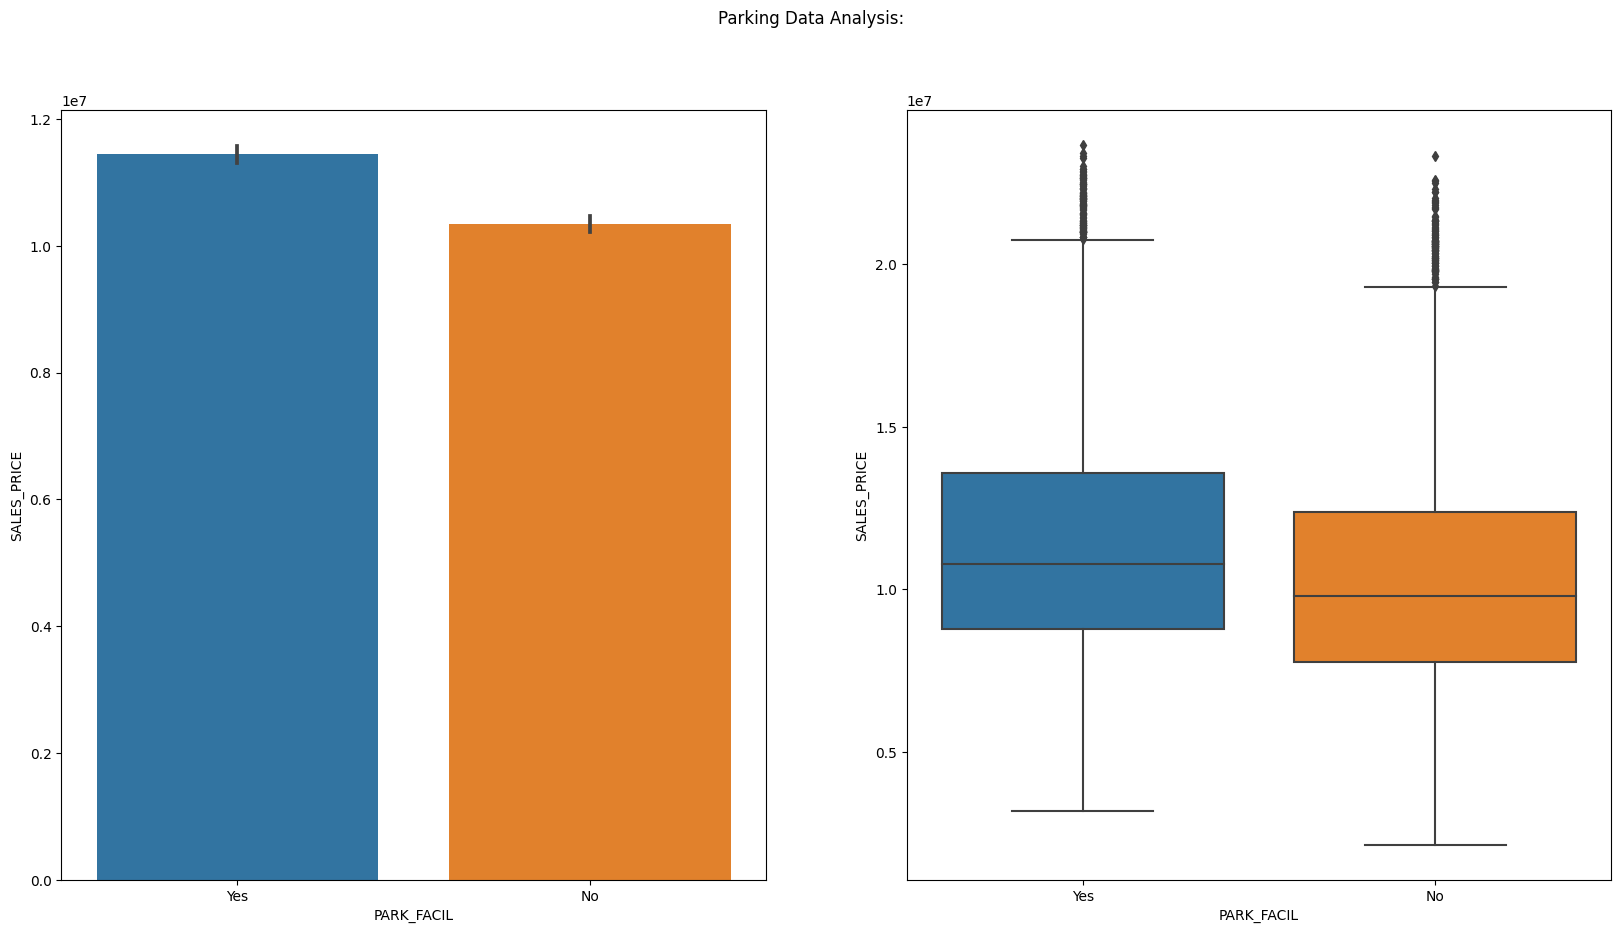

In [68]:
fig,(ax,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
fig.suptitle("Parking Data Analysis:")
sns.barplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'],ax=ax)
sns.boxplot(y=df['SALES_PRICE'],x=df['PARK_FACIL'],ax=ax1)

<p style="font-size:14px"> We can find houses that have parking facility have higher sales prices than houses without parking facility.</p>

<p style="font-size:14px"> We need to understand if there are only outliers in the 1bhk segement, because i suspect why do people prefer to buy house with price above 2e7 without parking facility, is the house in the prime location or are these values outliers. </p>

In [70]:
df[(df['PARK_FACIL']=='No') & (df['SALES_PRICE']>2e7)]

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age
1,Anna Nagar,1986,2.0,1.0,No,Commercial,Gravel,760122,304049,21717770,11
252,T Nagar,1887,2.0,1.0,No,Commercial,No Access,573985,348491,20499450,20
558,Anna Nagar,1905,2.0,1.0,No,Commercial,No Access,555981,123551,20591900,25
594,Anna Nagar,1976,2.0,1.0,No,Commercial,Paved,751564,322099,21473270,31
786,Anna Nagar,1792,1.0,1.0,No,Commercial,Gravel,683010,103486,20697270,11
...,...,...,...,...,...,...,...,...,...,...,...
6314,T Nagar,1908,2.0,1.0,No,Commercial,Paved,611940,203980,20398010,23
6449,Anna Nagar,1845,2.0,1.0,No,Commercial,Gravel,691035,167524,20940440,42
6835,Anna Nagar,1814,2.0,1.0,No,Commercial,Gravel,702322,392474,20656530,44
6843,T Nagar,1852,2.0,1.0,No,Commercial,Gravel,588755,284226,20301890,32


In [71]:
df[(df['PARK_FACIL']=='No') & (df['SALES_PRICE']>2e7)]['AREA'].value_counts()

AREA
Anna Nagar    51
T Nagar       33
KK Nagar       2
Name: count, dtype: int64

In [72]:
df[(df['PARK_FACIL']=='No') & (df['SALES_PRICE']>2e7)]['INT_SQFT'].describe()

count      86.000000
mean     1898.720930
std       120.508887
min      1611.000000
25%      1832.000000
50%      1903.000000
75%      1964.750000
max      2458.000000
Name: INT_SQFT, dtype: float64

<p style="font-size:14px"> From this we can understand, that the price difference is because these houses are located in prime locations and also Sqft feature influence. </p>

<Axes: >

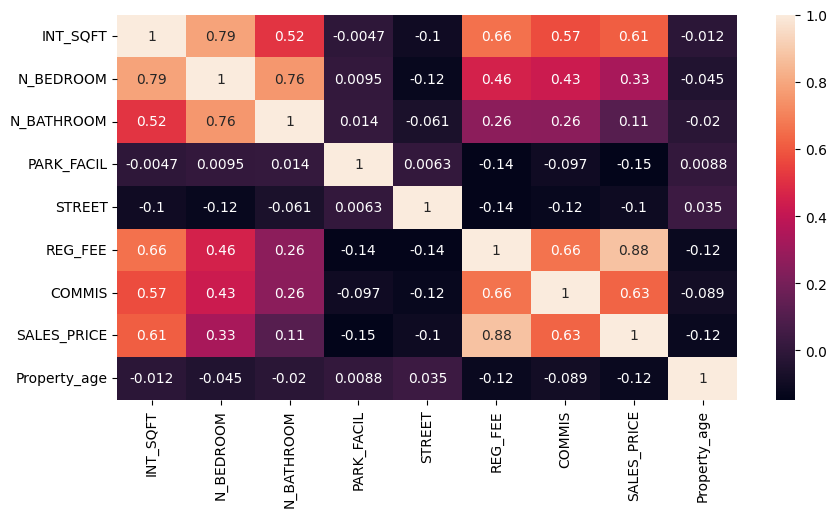

In [16]:
plt.figure(figsize=(10,5))

#Street Column Transformation
to_replace = {'Pavd':1,'Paved':1,'Gravel':2,'NoAccess':3,'No Access':3}
df['STREET'].replace(to_replace,inplace=True)
df['STREET'] = df['STREET'].astype(int)

#Utility Avail Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Parking Facility Column
value = {'No':0,'Yes':1}
df['PARK_FACIL'].replace(value,inplace=True)
df['PARK_FACIL'] = df['PARK_FACIL'].astype(int)



sns.heatmap(df.corr(numeric_only=True),annot=True)

# Removing Outliers

**1) Checking the details of outlier values found using boxplot while plotting no of bedroom vs sale price details**

<Axes: xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

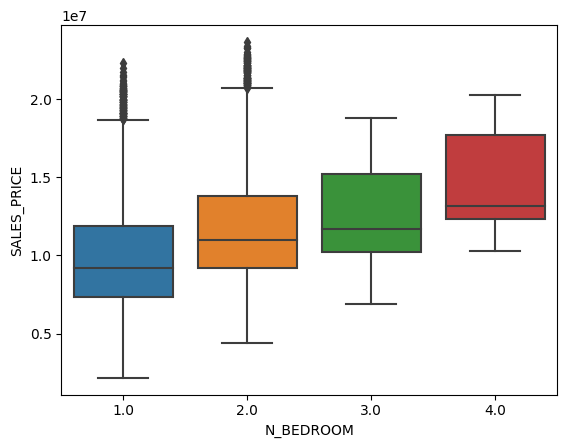

In [22]:
sns.boxplot(data=df,x='N_BEDROOM',y='SALES_PRICE')

In [17]:
df['Z_SALES_PRICE'] = df.groupby('N_BEDROOM')['SALES_PRICE'].transform(
    lambda x: (x - x.mean()) / x.std()
)


In [24]:
df[(df['N_BEDROOM'] == 1) & (df['Z_SALES_PRICE']>=3)].describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE
count,34.000000,34.0,34.0,34.000000,34.0,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.000000
mean,1738.235294,1.0,1.0,0.235294,0.0,1.558824,702743.676471,251813.470588,2.092972e+07,20.117647,3.124317
std,58.260158,0.0,0.0,0.430562,0.0,0.503995,91022.177054,90661.576525,4.570843e+05,10.593779,0.128196
min,1572.000000,1.0,1.0,0.000000,0.0,1.000000,516407.000000,103281.000000,2.050948e+07,5.000000,3.006454
25%,1703.000000,1.0,1.0,0.000000,0.0,1.000000,640494.000000,193424.250000,2.059667e+07,11.000000,3.030908
50%,1751.500000,1.0,1.0,0.000000,0.0,2.000000,707898.000000,256642.000000,2.079976e+07,18.500000,3.087866
75%,1788.750000,1.0,1.0,0.000000,0.0,2.000000,777962.000000,308240.250000,2.104818e+07,29.750000,3.157540
max,1797.000000,1.0,1.0,1.000000,0.0,2.000000,860513.000000,402279.000000,2.234885e+07,41.000000,3.522334


In [25]:
df[(df['N_BEDROOM'] == 1) & (df['Z_SALES_PRICE']>=3)]['AREA'].value_counts()

AREA
Anna Nagar    23
T Nagar       11
Name: count, dtype: int64

<p style="font-size:14px"> As we can see the sqft range is higher than the normal sqft range for 1 bhk and it is also located at prime region that is the reason why the price difference is large. </p>

In [26]:
df[(df['N_BEDROOM'] == 2) & (df['Z_SALES_PRICE']>=3)].describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE
count,5.000000,5.0,5.0,5.000000,5.0,5.0,5.000000,5.000000,5.000000e+00,5.000000,5.000000
mean,1945.600000,2.0,1.0,0.200000,0.0,2.0,842336.200000,290375.400000,2.338887e+07,16.200000,3.082061
std,35.011427,0.0,0.0,0.447214,0.0,0.0,101495.912613,142675.621191,1.658975e+05,11.519549,0.044181
min,1916.000000,2.0,1.0,0.000000,0.0,2.0,722752.000000,116535.000000,2.324759e+07,7.000000,3.044434
25%,1921.000000,2.0,1.0,0.000000,0.0,2.0,743923.000000,163202.000000,2.330700e+07,8.000000,3.060256
50%,1925.000000,2.0,1.0,0.000000,0.0,2.0,885666.000000,348714.000000,2.331458e+07,12.000000,3.062275
75%,1973.000000,2.0,1.0,0.000000,0.0,2.0,923026.000000,378677.000000,2.340786e+07,19.000000,3.087117
max,1993.000000,2.0,1.0,1.000000,0.0,2.0,936314.000000,444749.000000,2.366734e+07,35.000000,3.156220


In [27]:
df[(df['N_BEDROOM'] == 2) & (df['Z_SALES_PRICE']>=3)]['AREA'].value_counts()

AREA
T Nagar       3
Anna Nagar    2
Name: count, dtype: int64

<p style="font-size:14px"> Same applies for 2bhk as well </p>

**2) Sqft wise outlier treatment**

Approach:
<p> Formula = ( Sqft / No_of_Bedrooms ) < 400 <p>
<p> One Bedroom houses require atleast 400 sqft </p>
<p> With the above mentioned methodology we can predict which datas are outliers<p>
<p style="font-weight:bold"> Sqft --> 500 and N_Bedroom --> 2 not possible </p>

In [28]:
df[df['INT_SQFT']/df['N_BEDROOM']<400]

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE


**No outliers Found based on the Sqft/Bedroom method**

**3. Detecting Outliers by Custom Approach**

Approach:

Group data by Area, Builtype,and binned sqft, and remove the property with sales price greater than (2 * stdev + median_binned_sqft_sales_price) or less than (median_binned_sqft_sales_price - 2*stdev). This Approach helps to smoothen out the variation in sales price giving as accurate prediction by not considering the extreme outliers.
  

In [18]:
#Median Based outlier Treatment
def fun(x):
    return (int(x)//(100)) * (10)
    

df['BIN_SQFT'] = df['INT_SQFT'].apply(fun)
from statistics import stdev

stats = df.groupby(['AREA','BUILDTYPE','BIN_SQFT']).agg(
    median_sales = ('SALES_PRICE','median'),
    std_sales = ('SALES_PRICE','std'),
    count_sales = ('SALES_PRICE','count'),
    min_sales = ('SALES_PRICE','min'),
    max_sales = ('SALES_PRICE','max')
).reset_index()
stats['std_sales'] = stats['std_sales'].fillna(0)

In [19]:
len(stats)

164

In [107]:
stats[(stats['max_sales'] - stats['min_sales'])>15e5]

,AREA,BUILDTYPE,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
0,Adyar,Commercial,60,8820792.5,1.210248e+06,36,6036800,11719720
1,Adyar,Commercial,70,9782785.0,1.072806e+06,29,8098070,11827040
2,Adyar,Commercial,80,10847755.0,1.158796e+06,38,8355660,12724510
3,Adyar,Commercial,90,10968170.0,1.232656e+06,45,8558785,13969720
4,Adyar,Commercial,100,12076860.0,1.285011e+06,36,10646530,15242220
...,...,...,...,...,...,...,...,...
159,Velachery,Others,150,8661120.0,1.308643e+06,63,6074780,12415670
160,Velachery,Others,160,9170660.0,1.190693e+06,77,6461230,12129780
161,Velachery,Others,170,10236960.0,1.448583e+06,65,6928000,12564470
162,Velachery,Others,180,10130365.0,1.220724e+06,64,7810830,12669880


In [20]:
df = df.merge(stats,on=['AREA','BUILDTYPE','BIN_SQFT'],how='left')
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
0,Karapakkam,1004,1.0,1.0,0,Commercial,1,380000,144400,7600000,44,-0.614210,100,8788500.0,1.364749e+06,43,6201000,11089250
1,Anna Nagar,1986,2.0,1.0,1,Commercial,2,760122,304049,21717770,11,2.637021,190,21582080.0,9.295872e+05,54,19609850,23407860
2,Adyar,909,1.0,1.0,0,Commercial,2,421094,92114,13159200,20,0.944954,90,10968170.0,1.232656e+06,45,8558785,13969720
3,Velachery,1855,3.0,2.0,1,Others,1,356321,77042,9630290,22,-0.992411,180,10130365.0,1.220724e+06,64,7810830,12669880
4,Karapakkam,1226,1.0,1.0,0,Others,2,237000,74063,7406250,30,-0.668551,120,7071375.0,1.196341e+06,55,4243125,9951000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,Karapakkam,598,1.0,1.0,1,Others,3,208767,107060,5353000,49,-1.244417,50,4982937.5,1.152018e+06,48,2156875,7019000
7099,Velachery,1897,3.0,2.0,0,Others,3,346191,205551,10818480,9,-0.578352,180,10130365.0,1.220724e+06,64,7810830,12669880
7100,Velachery,1614,2.0,1.0,1,House,2,317354,167028,8351410,28,-0.922641,160,8896355.0,1.221177e+06,66,6334300,10843900
7101,Karapakkam,787,1.0,1.0,0,Commercial,1,425350,119098,8507000,32,-0.359828,70,7379750.0,1.356585e+06,33,4733000,9953250


<p style="font-size:14px">Our main aim is to reduce prediction error of 20 lakhs and above.

In [109]:
df[(df['SALES_PRICE'] >= (2*df['std_sales']+df['median_sales']))]

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
123,Karapakkam,1586,2.0,2.0,0,Commercial,2,586956,200424,14316000,28,0.665819,150,11359000.0,1.357739e+06,31,8710250,14316000
136,KK Nagar,1688,2.0,1.0,0,House,2,547810,285318,11412700,15,-0.107373,160,9743650.0,7.622558e+05,30,8599740,11574940
187,Karapakkam,795,1.0,1.0,0,House,2,254378,127189,8479250,9,-0.367611,70,5412500.0,1.347619e+06,52,2939750,8479250
265,Karapakkam,606,1.0,1.0,0,Others,2,353430,117810,7854000,17,-0.542972,60,5208500.0,1.141290e+06,34,2476375,7854000
305,T Nagar,2000,2.0,1.0,1,House,3,435100,95178,13596890,27,0.474309,200,13596890.0,0.000000e+00,1,13596890,13596890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,Adyar,1082,1.0,1.0,0,Commercial,2,502993,106696,15242220,28,1.529169,100,12076860.0,1.285011e+06,36,10646530,15242220
6804,Chrompet,1260,2.0,1.0,0,Others,2,364099,125552,12555150,9,0.196878,120,10300395.0,9.309302e+05,96,8218210,12851040
6889,Karapakkam,1493,2.0,2.0,0,Commercial,2,623779,235650,13861750,17,0.544845,140,11264375.0,1.277131e+06,36,8783500,13861750
6988,T Nagar,1988,2.0,1.0,0,Others,1,605797,294712,16372900,28,1.213602,190,14415540.0,9.658556e+05,35,12755280,16766120


In [111]:
df[(df['SALES_PRICE'] <= (df['median_sales'] - 2*df['std_sales']))].describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,1.290000e+02,129.000000,129.000000,129.000000,1.290000e+02,1.290000e+02,129.000000,1.290000e+02,1.290000e+02
mean,1422.953488,1.713178,1.255814,0.976744,2.449612,311800.317829,116106.860465,9.077297e+06,31.007752,-0.536236,138.372093,1.128727e+07,9.837266e+05,53.387597,8.999591e+06,1.314717e+07
std,503.876951,0.903066,0.438019,0.151302,0.865676,137015.495662,74866.143000,3.947314e+06,11.488103,1.047217,50.602475,3.691285e+06,2.815351e+05,27.475077,3.936927e+06,3.529739e+06
min,516.000000,1.000000,1.000000,0.000000,1.000000,71177.000000,12074.000000,2.156875e+06,5.000000,-2.140820,50.000000,4.982938e+06,0.000000e+00,1.000000,2.156875e+06,7.019000e+06
25%,991.000000,1.000000,1.000000,1.000000,2.000000,209736.000000,61820.000000,6.334300e+06,24.000000,-1.345599,90.000000,8.793625e+06,8.405513e+05,33.000000,6.334300e+06,1.064660e+07
50%,1462.000000,1.000000,1.000000,1.000000,3.000000,268034.000000,96992.000000,8.258600e+06,30.000000,-0.764961,140.000000,1.034345e+07,9.675109e+05,45.000000,8.071050e+06,1.241195e+07
75%,1774.000000,2.000000,2.000000,1.000000,3.000000,412379.000000,150020.000000,1.140238e+07,39.000000,0.030594,170.000000,1.350126e+07,1.196341e+06,78.000000,1.133820e+07,1.483277e+07
max,2500.000000,4.000000,2.000000,1.000000,3.000000,743023.000000,427494.000000,2.018198e+07,54.000000,2.396032,250.000000,2.191763e+07,1.448583e+06,107.000000,2.018198e+07,2.366734e+07


In [ ]:
df['AREA'].value_counts()

In [170]:
df[(df['SALES_PRICE'] >= (2*df['std_sales']+df['median_sales']))]['AREA'].value_counts()

AREA
Chrompet      38
KK Nagar      25
Karapakkam    19
Adyar         19
Velachery     14
Anna Nagar    14
T Nagar       11
Name: count, dtype: int64

In [172]:
df[(df['SALES_PRICE'] <= (df['median_sales'] - 2*df['std_sales']))].describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,1.290000e+02,129.000000,129.000000,1.290000e+02,1.290000e+02,129.000000,1.290000e+02,1.290000e+02
mean,1422.953488,1.713178,1.255814,0.976744,1.015504,2.449612,311800.317829,116106.860465,9.077297e+06,31.007752,138.372093,1.128727e+07,9.837266e+05,53.387597,8.999591e+06,1.314717e+07
std,503.876951,0.903066,0.438019,0.151302,0.819532,0.865676,137015.495662,74866.143000,3.947314e+06,11.488103,50.602475,3.691285e+06,2.815351e+05,27.475077,3.936927e+06,3.529739e+06
min,516.000000,1.000000,1.000000,0.000000,0.000000,1.000000,71177.000000,12074.000000,2.156875e+06,5.000000,50.000000,4.982938e+06,0.000000e+00,1.000000,2.156875e+06,7.019000e+06
25%,991.000000,1.000000,1.000000,1.000000,0.000000,2.000000,209736.000000,61820.000000,6.334300e+06,24.000000,90.000000,8.793625e+06,8.405513e+05,33.000000,6.334300e+06,1.064660e+07
50%,1462.000000,1.000000,1.000000,1.000000,1.000000,3.000000,268034.000000,96992.000000,8.258600e+06,30.000000,140.000000,1.034345e+07,9.675109e+05,45.000000,8.071050e+06,1.241195e+07
75%,1774.000000,2.000000,2.000000,1.000000,2.000000,3.000000,412379.000000,150020.000000,1.140238e+07,39.000000,170.000000,1.350126e+07,1.196341e+06,78.000000,1.133820e+07,1.483277e+07
max,2500.000000,4.000000,2.000000,1.000000,2.000000,3.000000,743023.000000,427494.000000,2.018198e+07,54.000000,250.000000,2.191763e+07,1.448583e+06,107.000000,2.018198e+07,2.366734e+07


In [ ]:
df[(df['SALES_PRICE'] <= (df['median_sales']-2*df['std_sales']))]['AREA'].value_counts()

In [ ]:
df[(df['SALES_PRICE'] >= (df['median_sales']+2*df['std_sales'])) | (df['SALES_PRICE'] <= (df['median_sales']-2*df['std_sales']))]['AREA'].value_counts().sum()

<p style="font-size:14px"> We will be losing 264 datapoints which i think is ok, and this move can significantly improve performance and give as better average results. </p>

In [21]:
print("Dataset Length before outlier treatment :" , len(df))
df.drop(df[((df['SALES_PRICE'] >= (df['median_sales']+2*df['std_sales'])) | (df['SALES_PRICE'] <= (df['median_sales']-2*df['std_sales']))) & (df['count_sales']>5)].index,inplace=True)
print("Dataset Length after outlier treatment :" , len(df))

Dataset Length before outlier treatment : 7103
Dataset Length after outlier treatment : 6844


In [22]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
0,Karapakkam,1004,1,1,0,Commercial,1,380000,144400,7600000,44,-0.614210,100,8788500.0,1.364749e+06,43,6201000,11089250
1,Anna Nagar,1986,2,1,1,Commercial,2,760122,304049,21717770,11,2.637021,190,21582080.0,9.295872e+05,54,19609850,23407860
2,Adyar,909,1,1,0,Commercial,2,421094,92114,13159200,20,0.944954,90,10968170.0,1.232656e+06,45,8558785,13969720
3,Velachery,1855,3,2,1,Others,1,356321,77042,9630290,22,-0.992411,180,10130365.0,1.220724e+06,64,7810830,12669880
4,Karapakkam,1226,1,1,0,Others,2,237000,74063,7406250,30,-0.668551,120,7071375.0,1.196341e+06,55,4243125,9951000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,Karapakkam,598,1,1,1,Others,3,208767,107060,5353000,49,-1.244417,50,4982937.5,1.152018e+06,48,2156875,7019000
7099,Velachery,1897,3,2,0,Others,3,346191,205551,10818480,9,-0.578352,180,10130365.0,1.220724e+06,64,7810830,12669880
7100,Velachery,1614,2,1,1,House,2,317354,167028,8351410,28,-0.922641,160,8896355.0,1.221177e+06,66,6334300,10843900
7101,Karapakkam,787,1,1,0,Commercial,1,425350,119098,8507000,32,-0.359828,70,7379750.0,1.356585e+06,33,4733000,9953250


<h3> Using pd.get_dummies to convert the areas to numerical values </h3>

In [23]:
#Convert into numeric values
new = pd.get_dummies(df['BUILDTYPE'],dtype=int)
new1 = pd.get_dummies(df['AREA'],dtype=int)

In [24]:
merged = pd.concat([new,new1],axis=1)
merged

,Commercial,House,Others,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7098,0,0,1,0,0,0,0,1,0,0
7099,0,0,1,0,0,0,0,0,0,1
7100,0,1,0,0,0,0,0,0,0,1
7101,1,0,0,0,0,0,0,1,0,0


In [25]:
df_merged = pd.concat([merged,df.drop(['AREA','BUILDTYPE'],axis=1)],axis=1)
df_merged

,Commercial,House,Others,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,...,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
0,1,0,0,0,0,0,0,1,0,0,...,144400,7600000,44,-0.614210,100,8788500.0,1.364749e+06,43,6201000,11089250
1,1,0,0,0,1,0,0,0,0,0,...,304049,21717770,11,2.637021,190,21582080.0,9.295872e+05,54,19609850,23407860
2,1,0,0,1,0,0,0,0,0,0,...,92114,13159200,20,0.944954,90,10968170.0,1.232656e+06,45,8558785,13969720
3,0,0,1,0,0,0,0,0,0,1,...,77042,9630290,22,-0.992411,180,10130365.0,1.220724e+06,64,7810830,12669880
4,0,0,1,0,0,0,0,1,0,0,...,74063,7406250,30,-0.668551,120,7071375.0,1.196341e+06,55,4243125,9951000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,0,0,1,0,0,0,0,1,0,0,...,107060,5353000,49,-1.244417,50,4982937.5,1.152018e+06,48,2156875,7019000
7099,0,0,1,0,0,0,0,0,0,1,...,205551,10818480,9,-0.578352,180,10130365.0,1.220724e+06,64,7810830,12669880
7100,0,1,0,0,0,0,0,0,0,1,...,167028,8351410,28,-0.922641,160,8896355.0,1.221177e+06,66,6334300,10843900
7101,1,0,0,0,0,0,0,1,0,0,...,119098,8507000,32,-0.359828,70,7379750.0,1.356585e+06,33,4733000,9953250


# Model Training

In [26]:
output = df_merged[['SALES_PRICE']]
input_features = df_merged.drop(['min_sales','max_sales','count_sales','std_sales','median_sales','Z_SALES_PRICE','BIN_SQFT','SALES_PRICE','COMMIS','REG_FEE'],axis=1)




In [27]:
input_features.columns

Index(['Commercial', 'House', 'Others', 'Adyar', 'Anna Nagar', 'Chrompet',
       'KK Nagar', 'Karapakkam', 'T Nagar', 'Velachery', 'INT_SQFT',
       'N_BEDROOM', 'N_BATHROOM', 'PARK_FACIL', 'STREET', 'Property_age'],
      dtype='object')

<Axes: xlabel='SALES_PRICE', ylabel='Count'>

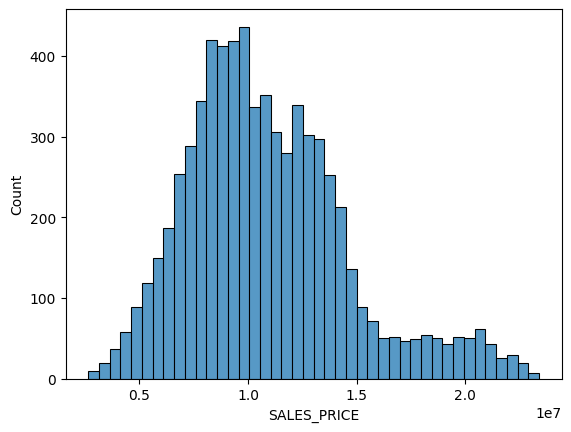

In [28]:
sns.histplot(data = output,x = 'SALES_PRICE')

<Axes: xlabel='SALES_PRICE', ylabel='Count'>

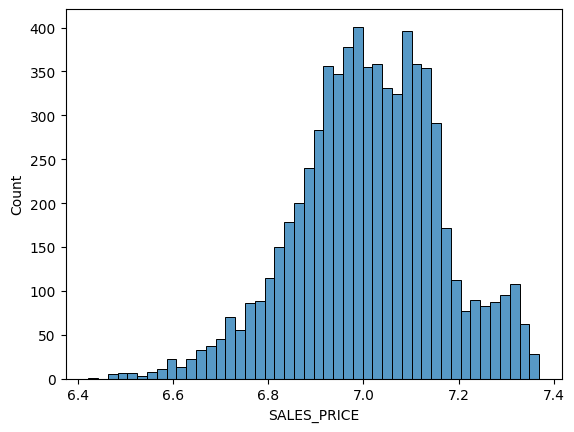

In [29]:
import numpy as np
log_transformed = np.log10(output[['SALES_PRICE']])
sns.histplot(data=log_transformed,x = 'SALES_PRICE')

**We will use linear regression model as our baseline model, while transforming the columns int_sqft,property_age using standard scaler and sales price using np.log10 to yield better performance.**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_features,np.log10(output),test_size=0.1,shuffle=10)

In [32]:
from sklearn.preprocessing import StandardScaler

property_ss = StandardScaler().fit(x_train[['Property_age']])
sqft_ss = StandardScaler().fit(x_train[['INT_SQFT']])
x_train['INT_SQFT'] = sqft_ss.transform(x_train[['INT_SQFT']])
x_test['INT_SQFT'] = sqft_ss.transform(x_test[['INT_SQFT']])

x_train['Property_age'] = property_ss.transform(x_train[['Property_age']])
x_test['Property_age'] = property_ss.transform(x_test[['Property_age']])



In [122]:
x_train

,Commercial,House,Others,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,STREET,Property_age
58,1,0,0,0,0,0,0,1,0,0,0.192550,2,2,1,3,-1.568372
6417,0,1,0,0,1,0,0,0,0,0,0.639126,1,1,1,1,1.617567
6784,0,1,0,0,0,0,0,1,0,0,0.516537,2,2,1,3,0.555587
5349,1,0,0,0,0,0,0,0,0,1,1.173266,3,2,1,1,0.637278
3891,0,1,0,0,0,0,0,0,1,0,1.109782,2,1,0,2,1.127422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0,0,1,0,0,1,0,0,0,0,-0.512339,1,1,1,2,1.290804
4185,0,1,0,1,0,0,0,0,0,0,-1.409869,1,1,1,3,0.555587
3712,0,0,1,0,0,0,1,0,0,0,1.884723,4,2,0,2,-1.078227
4767,0,1,0,0,0,0,1,0,0,0,1.632976,3,2,0,1,0.473896


In [141]:
x_train.shape

(6159, 14)

In [51]:
y_test.shape

(711, 1)

<h3>Linear Regression Model</h3>

In [34]:
regressor = LinearRegression()
model_lr = regressor.fit(x_train, y_train)
reg_score = model_lr.score(x_test,y_test)
reg_score

0.895298294235485

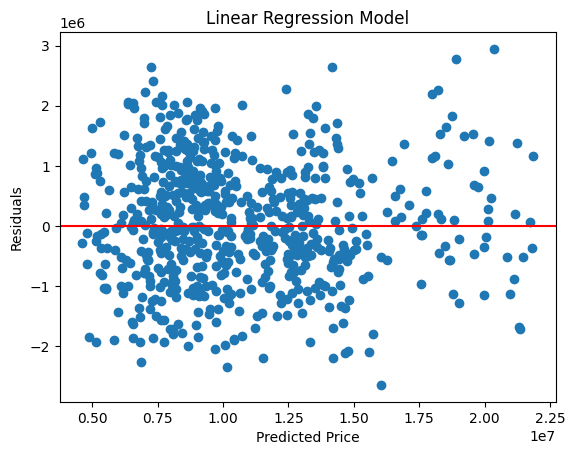

In [35]:
import numpy as np
y_pred = model_lr.predict(x_test)
res = 10**y_test - 10**y_pred
plt.axhline(y=0,color='red')
plt.scatter(10**y_pred,res)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Linear Regression Model')
plt.show()


**Next up we will move to ensemble models for better performance.**

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_features,output,test_size=0.1,shuffle=10)

**1) Random Forest Regressor**

In [37]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
model_rr = rr.fit(x_train,y_train)
model_score = rr.score(x_test,y_test)
model_score

0.9436976587096246

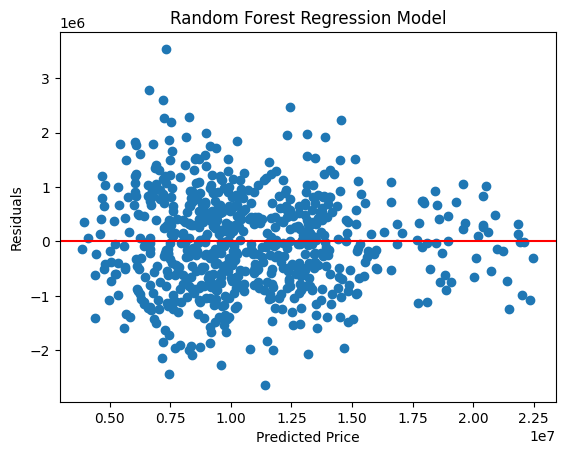

In [38]:
import numpy as np
y_pred = model_rr.predict(x_test)
res = y_test - y_pred.reshape(-1,1)
plt.axhline(y=0,color='red')
plt.scatter(y_pred.reshape(-1,1),res)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Random Forest Regression Model')
plt.show()


**2) Xgboost Regressor**

In [40]:
import xgboost as xg
xgb = xg.XGBRegressor()
model_xgb = xgb.fit(x_train,y_train)
model_score = xgb.score(x_test,y_test)
model_score

0.9493518001011039

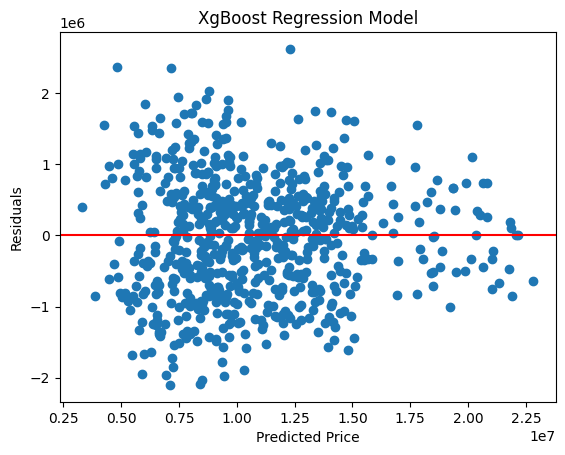

In [42]:
import numpy as np
y_pred = model_xgb.predict(x_test)
res = y_test - y_pred.reshape(-1,1)
plt.axhline(y=0,color='red')
plt.scatter(y_pred,res)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('XgBoost Regression Model')
plt.show()


<p style="font-size:14px"> Xgboost seems to be a promising model, let us do hyperparameter tuning in this model. </p>

In [71]:
params = model_xgb.get_params()
booster = model_xgb.get_booster()

print(f"Configured n_estimators: {params['n_estimators']}")
print(f"Actual trees in model: {len(booster.get_dump())}")


Configured n_estimators: None
Actual trees in model: 100
Number of boosting rounds: 100


In [72]:
from sklearn.model_selection import RandomSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],                # total number of trees
    'max_depth': [3, 4, 5, 6, 7],                   # tree depth — controls model complexity
    'learning_rate': [0.01, 0.05, 0.1, 0.2],        # lower = more robust but slower
    'subsample': [0.7, 0.8, 0.9, 1.0],              # row sampling (to prevent overfitting)
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],       # column sampling per tree
    'min_child_weight': [4, 5, 7],               # min sum of weights in a child
}

rsv = RandomSearchCV(n_iter=100,estimator = xg.XGBRegressor(),cv=5,param_grid = param_grid)
rsv.fit(x_train,y_train,verbose=0)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_child_weight': [4, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9, 1.0]})

In [74]:
results = pd.DataFrame(rsv.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_min_child_weight', 'param_n_estimators', 'param_subsample',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [75]:
results = pd.DataFrame(rsv.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
236,0.168732,0.005097,0.006422,0.000385,0.7,0.05,4,5,300,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.952256,0.954396,0.954216,0.955772,0.952134,0.953755,0.001383,1
249,0.170290,0.002448,0.006852,0.000289,0.7,0.05,4,7,300,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.952368,0.954570,0.953948,0.955482,0.952268,0.953727,0.001250,2
225,0.167016,0.005325,0.006398,0.000257,0.7,0.05,4,4,300,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.952348,0.954522,0.953641,0.955386,0.952348,0.953649,0.001197,3
237,0.171231,0.006917,0.006624,0.000444,0.7,0.05,4,5,300,0.8,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.952313,0.954389,0.953814,0.955361,0.952268,0.953629,0.001200,4
248,0.165047,0.004851,0.006708,0.000278,0.7,0.05,4,7,300,0.7,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.952200,0.954317,0.953959,0.955751,0.951891,0.953624,0.001424,5


In [76]:
rsv.score(x_test,y_test)

0.9543416185704888

In [77]:
y_pred = rsv.predict(x_test)
df = pd.DataFrame({'Actual':(y_test['SALES_PRICE']).ravel(),'Predicted':((y_pred).ravel())},index = y_test.index)
df['diff'] = df['Actual'] - df['Predicted']

In [78]:
df['diff'].describe()

count    6.850000e+02
mean     2.339069e+03
std      8.010750e+05
min     -1.888829e+06
25%     -6.119560e+05
50%      3.350900e+04
75%      5.662430e+05
max      2.281783e+06
Name: diff, dtype: float64

In [79]:
len(df[(df['diff']<=-1.5e6) | (df['diff']>=1.5e6)])

39

In [80]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

mape = mean_absolute_percentage_error(df['Actual'], df['Predicted'])
r2 = r2_score(df['Actual'], df['Predicted'])
rmse = np.sqrt(mean_squared_error(df['Actual'], df['Predicted']))

print(f"MAPE: {mape*100:.2f}%")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse/1e5:.2f} lakhs")

# Analyze by price segments
df['price_segment'] = pd.cut(df['Actual'], bins=[0, 50e5, 100e5, 200e5, float('inf')], 
                               labels=['<50L', '50-100L', '100-200L', '>200L'])
df.groupby('price_segment')['diff'].describe()

MAPE: 7.21%
R²: 0.954
RMSE: 8.00 lakhs


,count,mean,std,min,25%,50%,75%,max
price_segment,,,,,,,,
<50L,21.0,-830644.416667,494201.662310,-1838158.0,-1136249.50,-889821.50,-410617.00,5519.0
50-100L,304.0,-134244.792763,839840.591607,-1888829.0,-756897.25,-130699.25,446856.75,2175279.0
100-200L,338.0,173666.159763,732137.770862,-1522840.0,-367766.50,207713.50,627608.25,2281783.0
>200L,22.0,52593.181818,671780.635961,-961236.0,-460166.00,-32453.00,685510.00,1354696.0


In [83]:
pd.set_option('display.max_columns', None)

df_merged.loc[
    (df.index[ (df['diff'] <= -15e+05)])
    
].head(10)


,Commercial,House,Others,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,INT_SQFT,N_BEDROOM,N_BATHROOM,PARK_FACIL,STREET,REG_FEE,COMMIS,SALES_PRICE,Property_age,Z_SALES_PRICE,BIN_SQFT,median_sales,std_sales,count_sales,min_sales,max_sales
5367,1,0,0,0,0,0,0,0,0,1,1520,2,1,0,1,391798,106854,11872680,29,0.015126,150,12669485.0,1.147912e+06,66,10391900,15664740
1323,1,0,0,0,0,0,0,0,0,1,1540,2,1,0,2,480611,113829,12647660,18,0.221515,150,12669485.0,1.147912e+06,66,10391900,15664740
6101,0,1,0,1,0,0,0,0,0,0,993,1,1,0,2,246113,36193,7238630,22,-0.715562,90,7895235.0,1.433208e+06,39,5455965,10978335
3377,0,0,1,0,0,0,0,0,0,1,1828,3,2,0,3,298084,93684,8516690,22,-1.380476,180,10130365.0,1.220724e+06,64,7810830,12669880
2439,0,0,1,0,0,0,0,0,0,1,1979,3,2,0,2,389344,126537,9733590,37,-0.956413,190,10169600.0,1.080389e+06,53,8328830,12539630
668,0,1,0,0,0,0,0,0,0,1,1672,2,1,0,1,240385,142729,7512030,44,-1.146180,160,8896355.0,1.221177e+06,66,6334300,10843900
2508,0,1,0,1,0,0,0,0,0,0,1209,2,2,1,2,223991,67197,7466370,38,-1.158340,120,9458377.5,1.226493e+06,46,6466375,11409485
1821,0,0,1,0,0,0,0,1,0,0,1464,2,2,1,1,219546,87819,6272750,5,-1.476219,140,8729375.0,1.251723e+06,35,5727750,10388375
6455,0,0,1,1,0,0,0,0,0,0,827,1,1,1,2,228547,6349,6348535,9,-0.965203,80,7913195.0,1.144743e+06,36,5133330,9850425
3933,0,0,1,0,0,0,0,0,0,1,1615,2,1,0,1,315600,72831,8092310,38,-0.991643,160,9170660.0,1.190693e+06,77,6461230,12129780


# Predictions

In [84]:
input_features.columns

Index(['Commercial', 'House', 'Others', 'Adyar', 'Anna Nagar', 'Chrompet',
       'KK Nagar', 'Karapakkam', 'T Nagar', 'Velachery', 'INT_SQFT',
       'N_BEDROOM', 'N_BATHROOM', 'PARK_FACIL', 'STREET', 'Property_age'],
      dtype='object')

In [88]:
input_features['STREET'].unique().tolist()

[1, 2, 3]

In [97]:
def prediction(area,sqft,buildtype,bedroom,bathroom,park,street,property_age):
    loc_index = np.where(input_features.columns == area)[0][0]
    buildtype_index = np.where(input_features.columns == buildtype)[0][0]
    x = np.zeros(len(input_features.columns))
    x[10] = sqft
    x[11] = bedroom
    x[12] = bathroom
    x[13] = park
    x[14] = street
    x[15] = property_age
    try:
        x[loc_index] = 1
        x[buildtype_index] = 1
    except:
        print("Enter Valid Area or BuildType")
        
    print("Predicted Sales Prices are: ",gsv.predict([x])[0])
        
    
prediction('T Nagar',1931,'Commercial',2,1,1,1,20)
prediction('T Nagar',1931,'Others',2,1,1,1,17)
    

Predicted Sales Prices are:  21526404.0
Predicted Sales Prices are:  14298498.0


<h1>Thank you!!!</h1>
<h1>Suggestions are Welcomed<h1>